In [28]:
import tensorflow as tf
import time

class ArtificialDataset(tf.data.Dataset):
    def _generator(numsamples):
        time.sleep(0.03)
        for i in range(numsamples):
            time.sleep(0.015)
            yield (i,)
    def __new__(cls, numsamples=3):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature= tf.TensorSpec(shape=(1,), dtype=tf.int64),
            args=(numsamples,))

In [29]:
def benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    count = 0
    for e in range(num_epochs):
        for sample in dataset:
            count += 1
            time.sleep(0.01)
    print(f'Execution time: {time.perf_counter() - start_time} - {count}')

In [30]:
benchmark(ArtificialDataset())

Execution time: 0.2855942089809105 - 6


In [31]:
benchmark(ArtificialDataset()
    .prefetch(tf.data.AUTOTUNE))

Execution time: 0.23725308297434822 - 6


In [32]:
benchmark(tf.data.Dataset.range(2)
    .interleave(lambda _:ArtificialDataset()))

Execution time: 0.5671048749936745 - 12


In [33]:
benchmark(tf.data.Dataset.range(2)
    .interleave(
        lambda _:ArtificialDataset(),
        num_parallel_calls=tf.data.AUTOTUNE))

Execution time: 0.30371662497054785 - 12


In [34]:
def mapped_function(s):
    tf.py_function(lambda: time.sleep(0.03),[],())
    return s

In [35]:
benchmark(ArtificialDataset()
    .map(mapped_function))

Execution time: 0.47826929099392146 - 6


In [36]:
benchmark(ArtificialDataset()
    .map(
        mapped_function,
        num_parallel_calls=tf.data.AUTOTUNE))

Execution time: 0.2967952910112217 - 6


In [40]:
benchmark(ArtificialDataset()
    .map(
        mapped_function,
        num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    ,5)

Execution time: 0.309469707950484 - 15


In [67]:
fast_dataset = tf.data.Dataset.range(10000)

def fast_benchmark(dataset, num_epochs=2):
    count = 0
    start_time = time.perf_counter()
    for _ in tf.data.Dataset.range(num_epochs):
        for _ in dataset:
            count += 1
            
    print(f'Execution time: {time.perf_counter()-start_time} - {count}')

def increment(x):
    return x+1

In [68]:
fast_benchmark(
    fast_dataset
    .map(increment)
    .batch(256)
)

Execution time: 0.2600512499921024 - 80


In [72]:
fast_benchmark(
    fast_dataset
    .batch(256)
    .map(increment)
)

Execution time: 0.017449709004722536 - 80


In [75]:
fast_benchmark(
    fast_dataset
    .batch(256)
    .map(increment)
)

Execution time: 0.032734125037677586 - 80


In [78]:
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()

In [80]:
x_train.shape

(60000, 28, 28)

0
Time: 0.0660852090222761


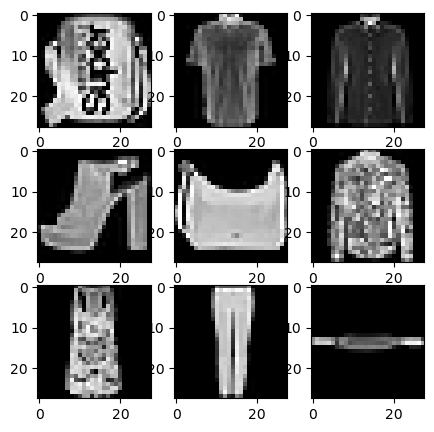

In [104]:
import matplotlib.pyplot as plt
import random
stime = time.perf_counter()
count = 0

fig, ax = plt.subplots(3,3, figsize=(5,5))

examples = tf.random.shuffle(x_train)[:9]
for _, axis in enumerate(ax.flat):
    ix = random.randint(0, len(x_train))
    axis.imshow(x_train[ix], cmap='gray')

print(count)
print(f'Time: {time.perf_counter() - stime}')

In [101]:
random.randint(0,len(x_train))

11953